In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_december_2021 = pd.read_csv('https://raw.githubusercontent.com/TanakornSunny/Mini-Project-Nav-Fund-Analysis/main/mf_nav_202112_th.csv')
df_july_2022 = pd.read_csv('https://raw.githubusercontent.com/TanakornSunny/Mini-Project-Nav-Fund-Analysis/main/mf_nav_202207_th.csv')

In [2]:
def calculateCi(data, ci_level = 95):
    if ci_level == 90:
        z = 1.65
    else:
        z = 1.96
    n = data['diff_percent_nav'].count()
    mean_diff = data.loc[ :, 'diff_percent_nav' ].mean()
    std_diff = data.loc[ :, 'diff_percent_nav' ].std()


    se = std_diff /np.sqrt(n)
    lcb = mean_diff - z* se  #lower limit of the CI
    ucb = mean_diff + z* se  #upper limit of the CI
    return lcb,ucb

In [3]:
equity_fund_december = df_december_2021[df_december_2021['POLICY_THAI_DESC'] == "ตราสารทุน"]
equity_fund_name_december = equity_fund_december['PROJ_ABBR_NAME'].unique()

In [4]:
equity_fund_july = df_july_2022[df_july_2022['POLICY_THAI_DESC'] == "ตราสารทุน"]
equity_fund_name_july = equity_fund_july['PROJ_ABBR_NAME'].unique()

In [5]:
duplicate_fund_name = []
for fund_name in equity_fund_name_july:
    if fund_name in equity_fund_name_december:
        duplicate_fund_name.append(fund_name)

In [6]:
equity_fund_jul_2022 = df_july_2022.loc[df_july_2022['PROJ_ABBR_NAME'].isin(duplicate_fund_name),['PROJ_ABBR_NAME','nav']].reset_index(drop=True)
equity_fund_dec_2022 = df_december_2021.loc[df_december_2021['PROJ_ABBR_NAME'].isin(duplicate_fund_name),['PROJ_ABBR_NAME','nav']].reset_index(drop=True)
equity_fund_dec_2022.columns = ['PROJ_ABBR_NAME_DEC', 'nav_dec']
equity_fund_jul_2022.columns = ['PROJ_ABBR_NAME_JUL', 'nav_jul']
display(equity_fund_dec_2022)
display(equity_fund_jul_2022)

,PROJ_ABBR_NAME_DEC,nav_dec
0,K-EQUITY,"3,476.88"
1,TISCOEQF,80.57
2,ONE-G,82.28
3,T-PPSD,795.14
4,TISCOEGF,571.31
...,...,...
845,KT-CLIMATE RMF,81.17
846,AFMOAT-H,493.25
847,TNEXTGENRMF,10.44
848,M-META,522.22


,PROJ_ABBR_NAME_JUL,nav_jul
0,K-EQUITY,"3,171.75"
1,TISCOEQF,77.68
2,ONE-G,74.14
3,T-PPSD,749.06
4,TISCOEGF,530.48
...,...,...
845,KT-CLIMATE RMF,78.41
846,AFMOAT-H,762.76
847,TNEXTGENRMF,13.62
848,M-META,351.77


In [7]:
equity_fund_inner = pd.merge( equity_fund_dec_2022, equity_fund_jul_2022, left_on='PROJ_ABBR_NAME_DEC', right_on='PROJ_ABBR_NAME_JUL' )
equity_fund_inner = equity_fund_inner.loc[:,['PROJ_ABBR_NAME_DEC','nav_dec','nav_jul']]
equity_fund_inner['nav_dec'] = equity_fund_inner['nav_dec'].apply(lambda x: float(x.split()[0].replace(',', '')))
equity_fund_inner['nav_jul'] = equity_fund_inner['nav_jul'].apply(lambda x: float(x.split()[0].replace(',', '')))
equity_fund_inner[['nav_dec','nav_jul']] = equity_fund_inner[['nav_dec','nav_jul']].astype(float)
display(equity_fund_inner)

,PROJ_ABBR_NAME_DEC,nav_dec,nav_jul
0,K-EQUITY,3476.88,3171.75
1,TISCOEQF,80.57,77.68
2,ONE-G,82.28,74.14
3,T-PPSD,795.14,749.06
4,TISCOEGF,571.31,530.48
...,...,...,...
845,KT-CLIMATE RMF,81.17,78.41
846,AFMOAT-H,493.25,762.76
847,TNEXTGENRMF,10.44,13.62
848,M-META,522.22,351.77


In [8]:
# plt.figure(figsize=(15,5),dpi=150)
# equity_fund_inner.plot(x="PROJ_ABBR_NAME_DEC", y=["nav_dec", "nav_jul"], kind="bar", figsize=(15, 8))

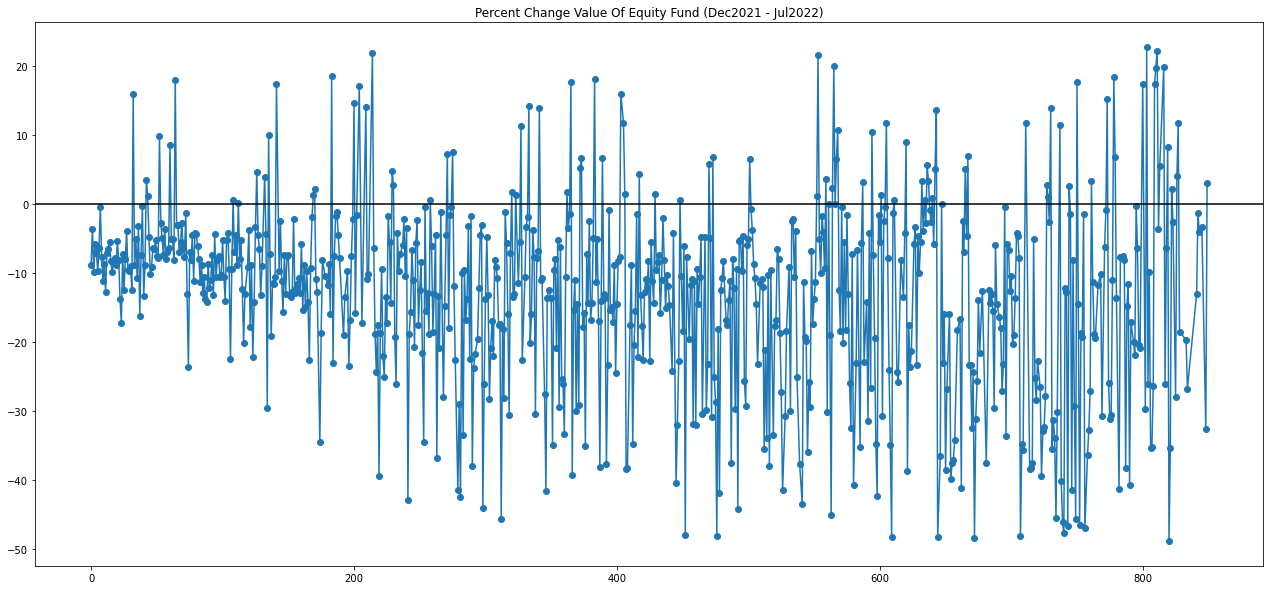

In [9]:
equity_fund_inner['diff_percent_nav'] = ((equity_fund_inner['nav_jul'] - equity_fund_inner['nav_dec'])/equity_fund_inner['nav_dec'])*100

# Delete Outlier Equity Fund
Q1 = equity_fund_inner['diff_percent_nav'].quantile(0.25)
Q3 = equity_fund_inner['diff_percent_nav'].quantile(0.75)
IQR = Q3 - Q1
equity_fund_inner = equity_fund_inner.loc[(equity_fund_inner['diff_percent_nav'] >= Q1 - 1.5 * IQR) & (equity_fund_inner['diff_percent_nav'] <= Q3 + 1.5 *IQR)]

# Scatter plot Fixed Income Fund (Different Nav)
plt.figure(figsize=(22,10))
plt.plot(equity_fund_inner.index, equity_fund_inner['diff_percent_nav'], '-o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.title("Percent Change Value Of Equity Fund (Dec2021 - Jul2022)")
plt.show()




In [10]:
# Construct CI at confidence level 95%
n = equity_fund_inner['diff_percent_nav'].count()
z = 1.65
mean_diff = equity_fund_inner.loc[ :, 'diff_percent_nav' ].mean()
std_diff = equity_fund_inner.loc[ :, 'diff_percent_nav' ].std()

se = std_diff /np.sqrt(n)
lcb = mean_diff - z* se  #lower limit of the CI
ucb = mean_diff + z* se  #upper limit of the CI
print(lcb,ucb)
# print("\nความแตกต่างของการลงทุนในตราสารทุนในเดือน ธันวาคม 2021 และ กรกฎาคม 2022 ไม่แตกต่างกัน")
print("\nนักลงทุนเลือกลงทุนในตราสารทุนในเดือน ธันวาคม 2021 มากกว่าเดือน กรกฎาคม 2022")

-13.943553199220275 -12.313040443065276

นักลงทุนเลือกลงทุนในตราสารทุนในเดือน ธันวาคม 2021 มากกว่าเดือน กรกฎาคม 2022


,PROJ_ABBR_NAME_DEC,nav_dec,nav_jul,diff_percent_nav
0,K-FIXED,56550.70,39290.18,-30.522204
1,SCBSFF,63295.91,53850.31,-14.922923
2,ONE-FAR,357.60,286.96,-19.753915
3,SCBRF,902.27,797.27,-11.637315
4,TMBMF,4281.97,5112.95,19.406488
...,...,...,...,...
313,KTTFP-UI,148.33,149.94,1.085418
314,KFF1YK-BR,588.84,596.17,1.244820
315,KFF1YL-BR,364.54,369.77,1.434685
316,KFF1YM-BR,268.37,271.68,1.233372


Confidence Interval : [-9.119842054555866 , -6.2530538181954745]

นักลงทุนเลือกที่จะลงทุนในตราสารหนี้ในเดือน ธันวาคม 2021 มากกว่าในเดือน กรกฎาคม 2022

Assumption: การขึ้นดอกเบี้ยของภาครัฐ ส่งผลให้นักลงทุนโยกย้ายเงินลงทุนไปลงทุนจากกองทุนที่มีความเสี่ยงสูง (ตราสารทุน) ไปลงทุนในที่มีความเสี่ยงต่ำกว่า (ตราสารหนี้)

Answer: การขึ้นดอกเบี้ยของภาครัฐ ส่งผลให้นักลงทุนเลือกลงทุนทั้งกองทุนที่มีความเสี่ยงสูง(ตราสารทุน) และกองทุนที่มีความเสี่ยงต่ำ(ตราสารหนี้) น้อยลงกว่าเดิม


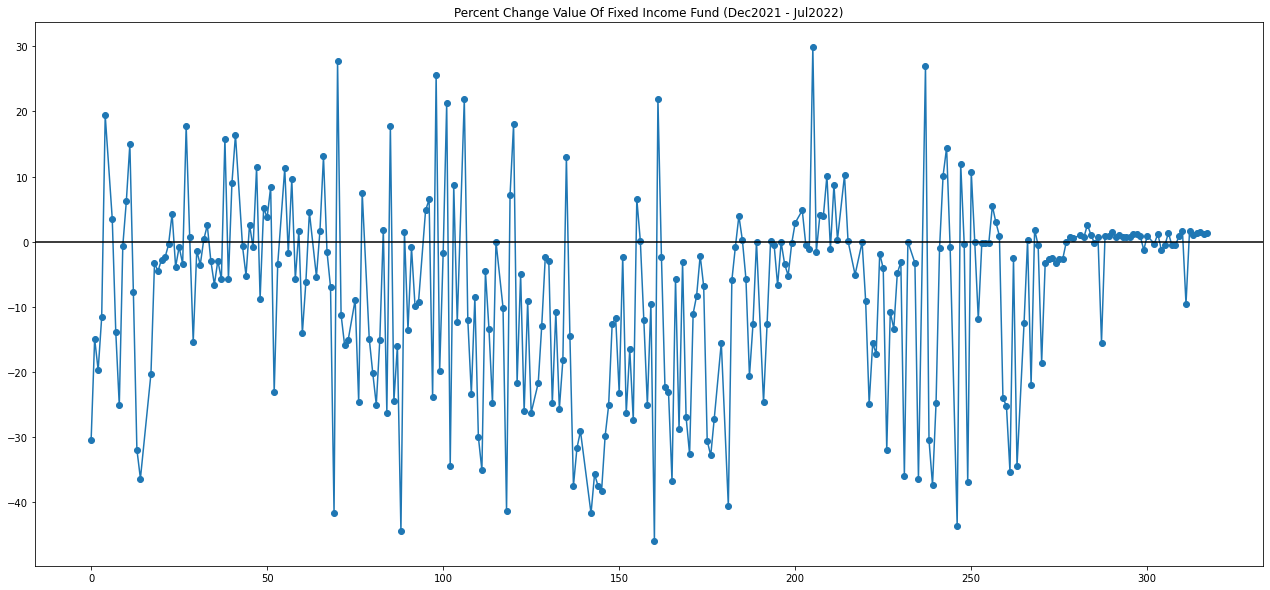

In [11]:
# ตราสารหนี้ Fixed Income Fund
# December
fixed_income_fund_december = df_december_2021[df_december_2021['POLICY_THAI_DESC'] == "ตราสารหนี้"]
fixed_income_fund_name_december = fixed_income_fund_december['PROJ_ABBR_NAME'].unique()
# July
fixed_income_fund_july = df_july_2022[df_july_2022['POLICY_THAI_DESC'] == "ตราสารหนี้"]
fixed_income_fund_name_july = fixed_income_fund_july['PROJ_ABBR_NAME'].unique()

# Find Duplicate fixed income fund
duplicate_fixed_income_fund_name = []
for fund_name in fixed_income_fund_name_july:
    if fund_name in fixed_income_fund_name_december:
        duplicate_fixed_income_fund_name.append(fund_name)

# Filter Duplicate fixed income fund
fixed_income_fund_jul_2022 = df_july_2022.loc[df_july_2022['PROJ_ABBR_NAME'].isin(duplicate_fixed_income_fund_name),['PROJ_ABBR_NAME','nav']].reset_index(drop=True)
fixed_income_fund_dec_2022 = df_december_2021.loc[df_december_2021['PROJ_ABBR_NAME'].isin(duplicate_fixed_income_fund_name),['PROJ_ABBR_NAME','nav']].reset_index(drop=True)
fixed_income_fund_dec_2022.columns = ['PROJ_ABBR_NAME_DEC', 'nav_dec']
fixed_income_fund_jul_2022.columns = ['PROJ_ABBR_NAME_JUL', 'nav_jul']

# Merge data between july 2022 and december 2021
fixed_income_fund_inner = pd.merge( fixed_income_fund_dec_2022, fixed_income_fund_jul_2022, left_on='PROJ_ABBR_NAME_DEC', right_on='PROJ_ABBR_NAME_JUL' )
fixed_income_fund_inner = fixed_income_fund_inner.loc[:,['PROJ_ABBR_NAME_DEC','nav_dec','nav_jul']]
fixed_income_fund_inner['nav_dec'] = fixed_income_fund_inner['nav_dec'].apply(lambda x: float(x.split()[0].replace(',', '')))
fixed_income_fund_inner['nav_jul'] = fixed_income_fund_inner['nav_jul'].apply(lambda x: float(x.split()[0].replace(',', '')))
fixed_income_fund_inner[['nav_dec','nav_jul']] = fixed_income_fund_inner[['nav_dec','nav_jul']].astype(float)

# Calculate the change
fixed_income_fund_inner['diff_percent_nav'] = ((fixed_income_fund_inner['nav_jul'] - fixed_income_fund_inner['nav_dec'])/fixed_income_fund_inner['nav_dec'])*100
display(fixed_income_fund_inner)

# Delete Outlier Fixed Income Fund
Q1 = fixed_income_fund_inner['diff_percent_nav'].quantile(0.25)
Q3 = fixed_income_fund_inner['diff_percent_nav'].quantile(0.75)
IQR = Q3 - Q1
fixed_income_fund_inner = fixed_income_fund_inner.loc[(fixed_income_fund_inner['diff_percent_nav'] >= Q1 - 1.5 * IQR) & (fixed_income_fund_inner['diff_percent_nav'] <= Q3 + 1.5 *IQR)]

# Construct Confident Interval
lcb,ucb = calculateCi(fixed_income_fund_inner, 90)
print(f"Confidence Interval : [{lcb} , {ucb}]")
print("\nนักลงทุนเลือกที่จะลงทุนในตราสารหนี้ในเดือน ธันวาคม 2021 มากกว่าในเดือน กรกฎาคม 2022")
print("\nAssumption: การขึ้นดอกเบี้ยของภาครัฐ ส่งผลให้นักลงทุนโยกย้ายเงินลงทุนไปลงทุนจากกองทุนที่มีความเสี่ยงสูง (ตราสารทุน) ไปลงทุนในที่มีความเสี่ยงต่ำกว่า (ตราสารหนี้)")
print("\nAnswer: การขึ้นดอกเบี้ยของภาครัฐ ส่งผลให้นักลงทุนเลือกลงทุนทั้งกองทุนที่มีความเสี่ยงสูง(ตราสารทุน) และกองทุนที่มีความเสี่ยงต่ำ(ตราสารหนี้) น้อยลงกว่าเดิม")


# Scatter plot Fixed Income Fund (Different Nav)
plt.figure(figsize=(22,10))
plt.plot(fixed_income_fund_inner.index, fixed_income_fund_inner['diff_percent_nav'], '-o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.title("Percent Change Value Of Fixed Income Fund (Dec2021 - Jul2022)")
plt.show()






,PROJ_ABBR_NAME_DEC,nav_dec,nav_jul,diff_percent_nav
0,K-EQUITY,3476.88,3171.75,-8.775972
1,TISCOEQF,80.57,77.68,-3.586943
2,ONE-G,82.28,74.14,-9.893048
3,T-PPSD,795.14,749.06,-5.795206
4,TISCOEGF,571.31,530.48,-7.146733
...,...,...,...,...
752,LHVN,290.93,587.65,101.990169
753,TLMSEQRMF,9.25,18.60,101.081081
754,KWI FIPVD,11.88,10.74,-9.595960
755,B-VIETNAMRMF,876.80,1219.54,39.089872


Confidence Interval : [-11.057842066986815 , -9.665477263203943]

การลงทุนของนักลงทุนใน active fund ในเดือน ธันวาคม 2021 มากกว่าในเดือน กรกฎาคม 2022


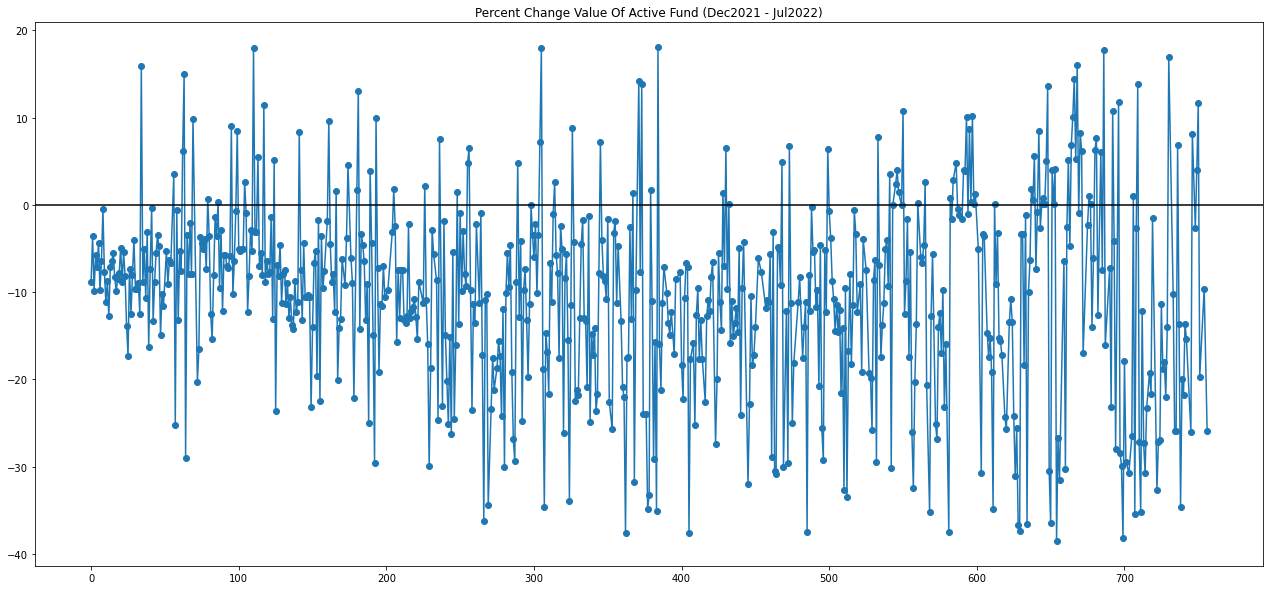

In [12]:
# Assumption 2
# Change Management Fund December 2021
df_management_style_dec = df_december_2021.copy()
df_management_style_dec['management_style_th'] = df_management_style_dec['management_style_th'].str.replace('มุ่งหวังให้ผลประกอบการเคลื่อนไหวตามดัชนีชี้วัด (passive management/index tracking)','passive_fund', regex=False)
df_management_style_dec['management_style_th'] = df_management_style_dec['management_style_th'].str.replace('มุ่งหวังให้ผลประกอบการสูงกว่าดัชนีชี้วัด (active management)','active_fund', regex=False)

# Change Management Fund July 2022
df_management_style_jul = df_july_2022.copy()
df_management_style_jul['management_style_th'] = df_management_style_jul['management_style_th'].str.replace('มุ่งหวังให้ผลประกอบการเคลื่อนไหวตามดัชนีชี้วัด (passive management/index tracking)','passive_fund', regex=False)
df_management_style_jul['management_style_th'] = df_management_style_jul['management_style_th'].str.replace('มุ่งหวังให้ผลประกอบการสูงกว่าดัชนีชี้วัด (active management)','active_fund', regex=False)

# Filter Active Fund December 2021
active_fund_december = df_management_style_dec[df_management_style_dec['management_style_th'] == "active_fund"]
active_fund_name_december = active_fund_december['PROJ_ABBR_NAME'].unique()

# Filter Active Fund July 2021
active_fund_july = df_management_style_jul[df_management_style_jul['management_style_th'] == "active_fund"]
active_fund_name_july = active_fund_july['PROJ_ABBR_NAME'].unique()

# Find Duplicate Active Fund
duplicate_active_fund_name = []
for fund_name in active_fund_name_july:
    if fund_name in active_fund_name_december:
        duplicate_active_fund_name.append(fund_name)

# Filter Duplicate Active Fund
active_fund_jul_2022 = df_management_style_jul.loc[df_management_style_jul['PROJ_ABBR_NAME'].isin(duplicate_active_fund_name),['PROJ_ABBR_NAME','nav']].reset_index(drop=True)
active_fund_dec_2022 = df_management_style_dec.loc[df_management_style_dec['PROJ_ABBR_NAME'].isin(duplicate_active_fund_name),['PROJ_ABBR_NAME','nav']].reset_index(drop=True)
active_fund_dec_2022.columns = ['PROJ_ABBR_NAME_DEC', 'nav_dec']
active_fund_jul_2022.columns = ['PROJ_ABBR_NAME_JUL', 'nav_jul']

# Merge data between july 2022 and december 2021
active_fund_inner = pd.merge( active_fund_dec_2022, active_fund_jul_2022, left_on='PROJ_ABBR_NAME_DEC', right_on='PROJ_ABBR_NAME_JUL' )
active_fund_inner = active_fund_inner.loc[:,['PROJ_ABBR_NAME_DEC','nav_dec','nav_jul']]
active_fund_inner['nav_dec'] = active_fund_inner['nav_dec'].apply(lambda x: float(x.split()[0].replace(',', '')))
active_fund_inner['nav_jul'] = active_fund_inner['nav_jul'].apply(lambda x: float(x.split()[0].replace(',', '')))
active_fund_inner[['nav_dec','nav_jul']] = active_fund_inner[['nav_dec','nav_jul']].astype(float)

# Calculate the change
active_fund_inner['diff_percent_nav'] = ((active_fund_inner['nav_jul'] - active_fund_inner['nav_dec'])/active_fund_inner['nav_dec'])*100
display(active_fund_inner)

# Delete Outlier Fixed Income Fund
Q1 = active_fund_inner['diff_percent_nav'].quantile(0.25)
Q3 = active_fund_inner['diff_percent_nav'].quantile(0.75)
IQR = Q3 - Q1
active_fund_inner = active_fund_inner.loc[(active_fund_inner['diff_percent_nav'] >= Q1 - 1.5 * IQR) & (active_fund_inner['diff_percent_nav'] <= Q3 + 1.5 *IQR)]

# Construct Confident Interval
lcb,ucb = calculateCi(active_fund_inner, 90)
print(f"Confidence Interval : [{lcb} , {ucb}]")
print("\nการลงทุนของนักลงทุนใน active fund ในเดือน ธันวาคม 2021 มากกว่าในเดือน กรกฎาคม 2022")

# Scatter plot Fixed Income Fund (Different Nav)
plt.figure(figsize=(22,10))
plt.plot(active_fund_inner.index, active_fund_inner['diff_percent_nav'], '-o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.title("Percent Change Value Of Active Fund (Dec2021 - Jul2022)")
plt.show()



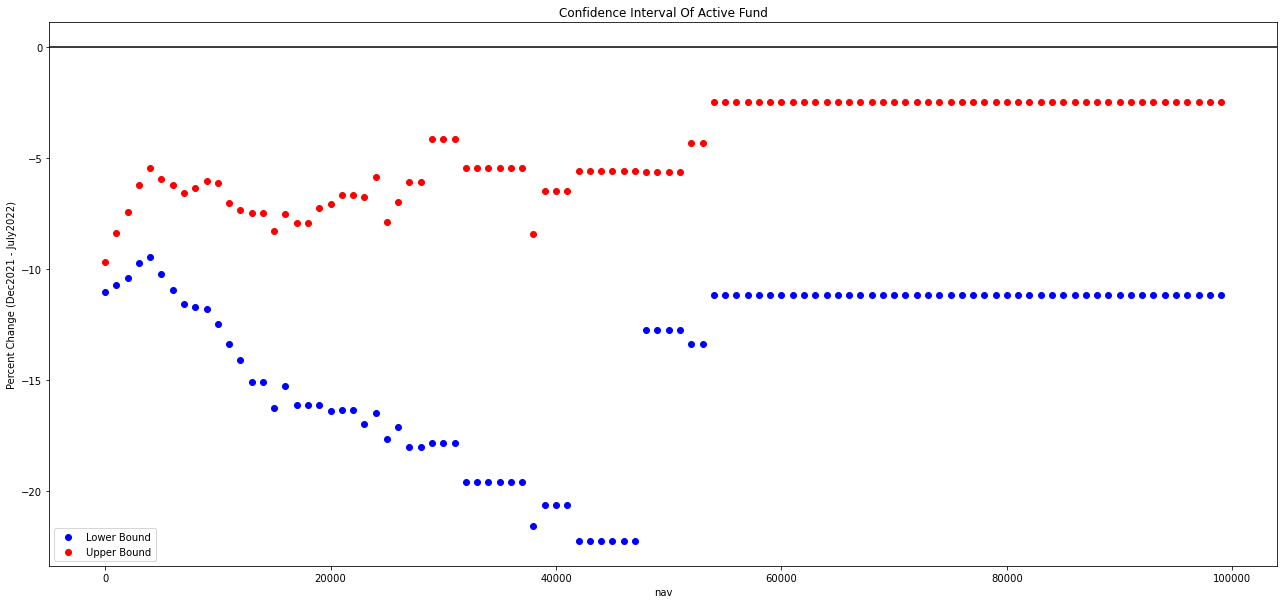

In [13]:
# Sensitivity Active Fund
lcb_list = []
ucb_list = []
nav_list = []
for nav in range(0, 100000, 1000):
    active_fund_inner_sensitivity = active_fund_inner.copy()
    active_fund_inner_sensitivity = active_fund_inner_sensitivity.loc[ (active_fund_inner_sensitivity['nav_dec'] >= nav) & (active_fund_inner_sensitivity['nav_jul'] >= nav), : ]
    if active_fund_inner_sensitivity['diff_percent_nav'].count() <= 1:
        break
    lcb,ucb = calculateCi(active_fund_inner_sensitivity, 90)
    nav_list.append(nav)
    lcb_list.append(lcb)
    ucb_list.append(ucb)
sensitivity_active_fund = {'nav': nav_list, 'lcb': lcb_list, 'ucb': ucb_list}
df_sensitivity_active_fund = pd.DataFrame(data=sensitivity_active_fund)


# Scatter Plot Sensitivity
plt.figure(figsize=(22,10))
plt.scatter(df_sensitivity_active_fund['nav'], df_sensitivity_active_fund['lcb'], c = "blue")
plt.scatter(df_sensitivity_active_fund['nav'], df_sensitivity_active_fund['ucb'], c ="red")
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.legend(["Lower Bound" , "Upper Bound"])
plt.xlabel("nav")
plt.ylabel("Percent Change (Dec2021 - July2022)")
plt.title("Confidence Interval Of Active Fund")
plt.show()




,PROJ_ABBR_NAME_DEC,nav_dec,nav_jul,diff_percent_nav
0,SCBSETFUND,11911.50,12054.99,1.204634
1,TMB50,13759.32,13383.39,-2.732184
2,CPRMF1,44.29,43.92,-0.835403
3,TMB50RMF,3664.97,3564.10,-2.752274
4,CPRMF2,56.55,55.82,-1.290893
...,...,...,...,...
92,SCBSETSSF,791.92,754.80,-4.687342
93,KTESGS,666.08,629.23,-5.532368
94,KFS100,1868.19,1816.89,-2.745973
95,PRINCIPAL SET50SSF,123.83,127.92,3.302915


Confidence Interval : [-7.9734415529636875 , -4.740262047394013]

การลงทุนของนักลงทุนใน passive fund ในเดือน ธันวาคม 2021 มากกว่าในเดือน กรกฎาคม 2022


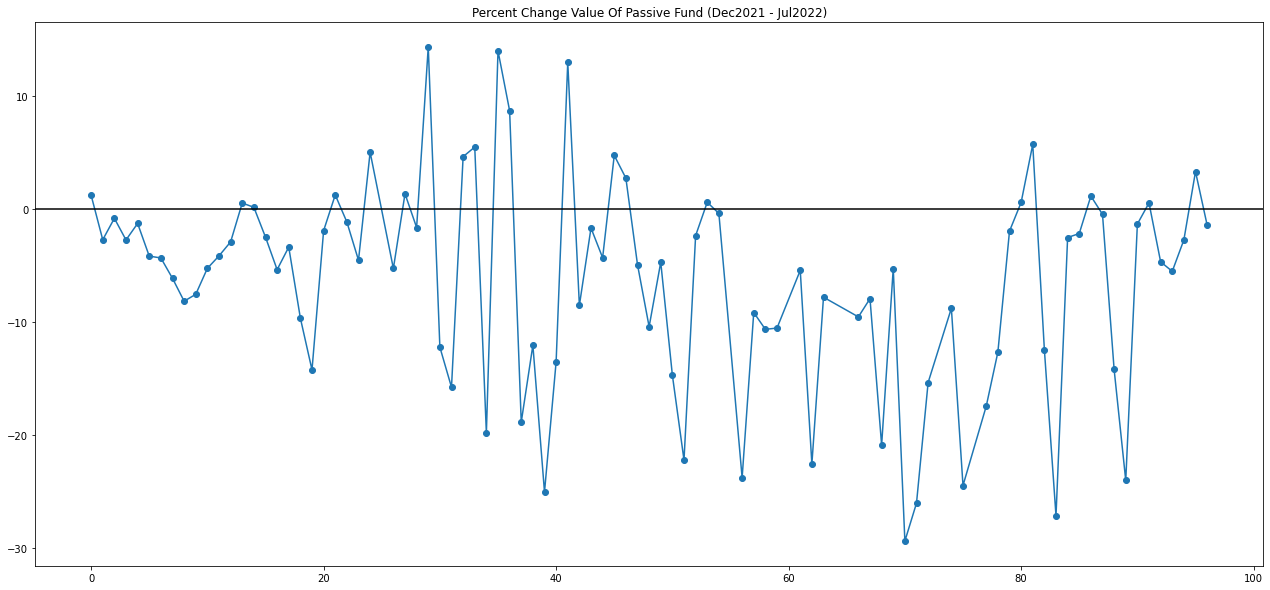

In [14]:
# Filter Passive Fund December 2021
passive_fund_december = df_management_style_dec[df_management_style_dec['management_style_th'] == "passive_fund"]
passive_fund_name_december = passive_fund_december['PROJ_ABBR_NAME'].unique()

# Filter Passive Fund July 2021
passive_fund_july = df_management_style_jul[df_management_style_jul['management_style_th'] == "passive_fund"]
passive_fund_name_july = passive_fund_july['PROJ_ABBR_NAME'].unique()

# Find Duplicate Passive Fund
duplicate_passive_fund_name = []
for fund_name in passive_fund_name_july:
    if fund_name in passive_fund_name_december:
        duplicate_passive_fund_name.append(fund_name)

# Filter Duplicate Active Fund
passive_fund_jul_2022 = df_management_style_jul.loc[df_management_style_jul['PROJ_ABBR_NAME'].isin(duplicate_passive_fund_name),['PROJ_ABBR_NAME','nav']].reset_index(drop=True)
passive_fund_dec_2022 = df_management_style_dec.loc[df_management_style_dec['PROJ_ABBR_NAME'].isin(duplicate_passive_fund_name),['PROJ_ABBR_NAME','nav']].reset_index(drop=True)
passive_fund_dec_2022.columns = ['PROJ_ABBR_NAME_DEC', 'nav_dec']
passive_fund_jul_2022.columns = ['PROJ_ABBR_NAME_JUL', 'nav_jul']

# Merge data between july 2022 and december 2021
passive_fund_inner = pd.merge( passive_fund_dec_2022, passive_fund_jul_2022, left_on='PROJ_ABBR_NAME_DEC', right_on='PROJ_ABBR_NAME_JUL' )
passive_fund_inner = passive_fund_inner.loc[:,['PROJ_ABBR_NAME_DEC','nav_dec','nav_jul']]
passive_fund_inner['nav_dec'] = passive_fund_inner['nav_dec'].apply(lambda x: float(x.split()[0].replace(',', '')))
passive_fund_inner['nav_jul'] = passive_fund_inner['nav_jul'].apply(lambda x: float(x.split()[0].replace(',', '')))
passive_fund_inner[['nav_dec','nav_jul']] = passive_fund_inner[['nav_dec','nav_jul']].astype(float)


# Calculate the change
passive_fund_inner['diff_percent_nav'] = ((passive_fund_inner['nav_jul'] - passive_fund_inner['nav_dec'])/passive_fund_inner['nav_dec'])*100
display(passive_fund_inner)

# Delete Outlier Passive Fund
Q1 = passive_fund_inner['diff_percent_nav'].quantile(0.25)
Q3 = passive_fund_inner['diff_percent_nav'].quantile(0.75)
IQR = Q3 - Q1
passive_fund_inner = passive_fund_inner.loc[(passive_fund_inner['diff_percent_nav'] >= Q1 - 1.5 * IQR) & (passive_fund_inner['diff_percent_nav'] <= Q3 + 1.5 *IQR)]

# Construct Confident Interval
lcb,ucb = calculateCi(passive_fund_inner, 90)
print(f"Confidence Interval : [{lcb} , {ucb}]")
print("\nการลงทุนของนักลงทุนใน passive fund ในเดือน ธันวาคม 2021 มากกว่าในเดือน กรกฎาคม 2022")

# Scatter plot Passive Fund (Different Nav)
plt.figure(figsize=(22,10))
plt.plot(passive_fund_inner.index, passive_fund_inner['diff_percent_nav'], '-o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.title("Percent Change Value Of Passive Fund (Dec2021 - Jul2022)")
plt.show()